## <font color = '#30A2FF'> Sentiment vs. Return Rate - classification

#2 DOGECOIN

>Algorithms:
    <ol>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbors (KNN)</li>
    <li>Support Vector Machines (SVM)</li>
    <li>Naive Bayes Classifier  - Bernoulli, Gaussian, Multinomial</li>
    <li>Decision Trees</li>
    <li>Random Forest(RF)</li>
    <li>Adaptive Boosting</li>
    <li>eXtreme Gradient Boosting (XGBoost)</li>
    <li>Catboost</li>
    <li>Light Gradient Boosting Machine (LGBM)</li>
    </ol>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Libraries for algorithms:

!! Don't forget to use hyperparameter tuning to get better performance

In [2]:
# Grid Search or RandomizedSearchCV for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
# Metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score,auc,roc_curve, roc_auc_score, ConfusionMatrixDisplay 
# Logistic Regresion
from sklearn.linear_model import LogisticRegression
# Naive Bayes Classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB 
# Support Vector Machines
from sklearn.svm import LinearSVC, SVC
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Decision Trees + Random Forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Boosting Algorithms
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn import gaussian_process, neural_network

In [3]:
tweets = pd.read_csv('../data/final tweets.csv')
stocks = pd.read_csv('../data/stocks_data.csv')
vader_indicators_daily = pd.read_csv('../data/indicators_VADER_sentiment.csv')

In [4]:
tweets.head()
tweets.drop('date.1', axis = 1, inplace = True)
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.00,0.050000,neutral,NEGATIVE,0.999413,0
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.65,0.600000,positive,POSITIVE,0.996815,1
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.000000,neutral,POSITIVE,0.953198,1
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.55,0.633333,positive,NEGATIVE,0.969831,1
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.750000,neutral,POSITIVE,0.954011,1


In [5]:
columns_to_drop = ['blob_polarity','blob_subjectivity', 'blob_sentiment', 'sentiment_flair','probability_flair',
                   'classified_similarly']
tweets.drop(columns_to_drop, axis = 1, inplace=True)

In [6]:
tweets.isna().sum()

date                        0
tweet                       0
tweet_clean_func            0
tweet_emojis                0
tweet_clean              1267
hashtag                     0
vader_clean_scores          0
vader_clean_compound        0
vader_negative              0
vader_positive              0
vader_neutral               0
vader_clean_sentiment       0
vader_clean_polarity     8638
dtype: int64

In [7]:
tweets['vader_clean_polarity'].fillna(0, inplace=True)
tweets['tweet_clean'].fillna('', inplace=True)

In [8]:
tweets.isna().sum()

date                     0
tweet                    0
tweet_clean_func         0
tweet_emojis             0
tweet_clean              0
hashtag                  0
vader_clean_scores       0
vader_clean_compound     0
vader_negative           0
vader_positive           0
vader_neutral            0
vader_clean_sentiment    0
vader_clean_polarity     0
dtype: int64

In [9]:
stocks.head()
stocks = stocks.rename(columns = {'Date':'date'})
stocks.head()

,date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Tsla,label_rt_Btc,label_rt_Doge
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


- Create 3 dfs for each stock:
    1. Tesla
    2. Dogecoin
    3. Bitcoin
- Merge Vader Sentiment Indicators with each df


In [10]:
columns_tesla = ['date', 'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla',
                 'Close_Tsla_Rescaled', 'label_rt_Tsla']

columns_bitcoin = ['date', 'Close_Btc', 'Volume_Btc', 'simple_return_Btc','log_return_Btc', 
                   'Close_Btc_Rescaled', 'label_rt_Btc']

columns_dogecoin = ['date', 'Close_Doge', 'Volume_Doge','simple_return_Doge', 'log_return_Doge', 
                    'Close_Doge_Rescaled', 'label_rt_Doge']

tesla_df = stocks[columns_tesla]
bitcoin_df = stocks[columns_bitcoin]
dogecoin_df = stocks[columns_dogecoin]

In [11]:
vader_indicators_daily.head()

,date,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
0,2010-06-04,0.051600,0.194079,0.245000,0.363000,0.392000
1,2011-12-01,0.406300,1.000000,0.000000,0.181500,0.818500
2,2011-12-03,0.299700,0.248428,0.119500,0.198500,0.682000
3,2011-12-04,0.734600,1.000000,0.000000,0.508000,0.492000
4,2011-12-21,0.269667,0.477783,0.121167,0.264833,0.613833


In [12]:
vader_indicators_daily.set_index('date', inplace=True)

### <font color = '#FFF5B8'>DOGECOIN

In [13]:
dogecoin_df.shape

(3241, 7)

In [14]:
dogecoin_df

,date,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Doge
0,2010-06-29,NaN,NaN,NaN,NaN,NaN,0
1,2010-06-30,NaN,NaN,NaN,NaN,NaN,0
2,2010-07-01,NaN,NaN,NaN,NaN,NaN,0
3,2010-07-02,NaN,NaN,NaN,NaN,NaN,0
4,2010-07-06,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
3236,2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477,0
3237,2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451,1
3238,2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578,1
3239,2023-05-11,0.072085,325440313.0,-0.015582,-0.015705,0.103910,0


In [15]:
dogecoin_df = dogecoin_df[dogecoin_df['date'] >= '2017-11-09']
dogecoin_df

,date,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Doge
1856,2017-11-09,0.001415,6259550.0,NaN,NaN,0.000551,0
1857,2017-11-10,0.001163,4246520.0,-0.178092,-0.196127,0.000183,0
1858,2017-11-13,0.001211,2481270.0,0.166667,0.154151,0.000253,1
1859,2017-11-14,0.001184,2660340.0,-0.022296,-0.022548,0.000214,0
1860,2017-11-15,0.001339,2840180.0,0.130912,0.123024,0.000440,1
...,...,...,...,...,...,...,...
3236,2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477,0
3237,2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451,1
3238,2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578,1
3239,2023-05-11,0.072085,325440313.0,-0.015582,-0.015705,0.103910,0


In [16]:
dogecoin_df.set_index('date', inplace=True)
dogecoin = pd.merge(dogecoin_df, vader_indicators_daily, left_index=True, right_index=True, how='left')
dogecoin

,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Doge,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,,
2017-11-09,0.001415,6259550.0,NaN,NaN,0.000551,0,-0.113150,-0.214286,0.170000,0.110000,0.720000
2017-11-10,0.001163,4246520.0,-0.178092,-0.196127,0.000183,0,0.318200,1.000000,0.000000,1.000000,0.000000
2017-11-13,0.001211,2481270.0,0.166667,0.154151,0.000253,1,0.624900,1.000000,0.000000,0.175000,0.825000
2017-11-14,0.001184,2660340.0,-0.022296,-0.022548,0.000214,0,NaN,NaN,NaN,NaN,NaN
2017-11-15,0.001339,2840180.0,0.130912,0.123024,0.000440,1,-0.462400,-0.511654,0.362500,0.109000,0.528750
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451,1,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578,1,0.181463,0.762771,0.036657,0.276943,0.629229


In [17]:
dogecoin = dogecoin[['label_rt_Doge', 'vader_clean_compound', 'vader_clean_polarity', 'vader_negative', 
               'vader_positive', 'vader_neutral']]
dogecoin.fillna(0, inplace=True)
dogecoin

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1675/556234699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogecoin.fillna(0, inplace=True)


,label_rt_Doge,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2017-11-09,0,-0.113150,-0.214286,0.170000,0.110000,0.720000
2017-11-10,0,0.318200,1.000000,0.000000,1.000000,0.000000
2017-11-13,1,0.624900,1.000000,0.000000,0.175000,0.825000
2017-11-14,0,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-15,1,-0.462400,-0.511654,0.362500,0.109000,0.528750
...,...,...,...,...,...,...
2023-05-08,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,1,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,1,0.181463,0.762771,0.036657,0.276943,0.629229


In [18]:
X = dogecoin.drop('label_rt_Doge', axis = 1) 
y = dogecoin['label_rt_Doge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [19]:
X_train.shape

(1038, 5)

In [20]:
X_test.shape

(347, 5)

#### Create a summary for all models used in analysis

In [21]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [22]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    row_index+=1

Learning rate set to 0.086467
0:	learn: 0.6913274	total: 57.5ms	remaining: 5.69s
1:	learn: 0.6895184	total: 58.1ms	remaining: 2.85s
2:	learn: 0.6875071	total: 59ms	remaining: 1.91s
3:	learn: 0.6862379	total: 59.9ms	remaining: 1.44s
4:	learn: 0.6851015	total: 60.7ms	remaining: 1.15s
5:	learn: 0.6834369	total: 61.4ms	remaining: 961ms
6:	learn: 0.6813386	total: 62.2ms	remaining: 826ms
7:	learn: 0.6803042	total: 62.8ms	remaining: 722ms
8:	learn: 0.6789913	total: 63.4ms	remaining: 642ms
9:	learn: 0.6776636	total: 64.1ms	remaining: 577ms
10:	learn: 0.6763334	total: 64.7ms	remaining: 524ms
11:	learn: 0.6749426	total: 65.5ms	remaining: 480ms
12:	learn: 0.6739308	total: 66.1ms	remaining: 443ms
13:	learn: 0.6729148	total: 66.8ms	remaining: 410ms
14:	learn: 0.6716409	total: 67.5ms	remaining: 382ms
15:	learn: 0.6706172	total: 68.2ms	remaining: 358ms
16:	learn: 0.6697871	total: 69ms	remaining: 337ms
17:	learn: 0.6688299	total: 69.8ms	remaining: 318ms
18:	learn: 0.6682263	total: 70.5ms	remaining: 30

In [23]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
1,RandomForestClassifier,0.9403,0.5303,0.503268,0.469512,0.54275,0.485804
6,LogisticRegression,0.5414,0.5476,0.563636,0.189024,0.54078,0.283105
3,CalibratedClassifierCV,0.5279,0.5245,0.000000,0.000000,0.53495,0.000000
4,DecisionTreeClassifier,0.9403,0.5360,0.508380,0.554878,0.52967,0.530612
2,GaussianNB,0.5328,0.5389,0.526316,0.243902,0.51969,0.333333
10,BernoulliNB,0.5405,0.5447,0.542857,0.231707,0.51181,0.324786
9,LGBMClassifier,0.9085,0.5130,0.484076,0.463415,0.50357,0.473520
5,XGBClassifier,0.9094,0.5331,0.506024,0.512195,0.50333,0.509091
8,CatBoostClassifier,0.7206,0.4986,0.462121,0.371951,0.50160,0.412162
0,AdaBoostClassifier,0.6204,0.5072,0.476190,0.426829,0.48386,0.450161


#### <font color = '#00C4FF'> LOGISTIC REGRESSION


In [24]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67       183
           1       0.56      0.19      0.28       164

    accuracy                           0.55       347
   macro avg       0.55      0.53      0.48       347
weighted avg       0.55      0.55      0.49       347



#### From a total of 347 observations, 190 were correctly classified 

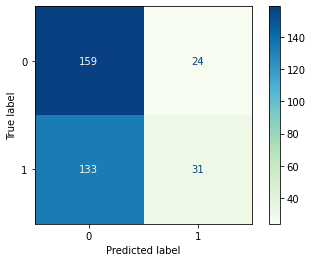

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [27]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.5250232255667038

In [28]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5359420289855072

#### <font color = '#00C4FF'> K-NEAREST NEIGHBORS

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       183
           1       0.39      0.29      0.33       164

    accuracy                           0.45       347
   macro avg       0.43      0.44      0.43       347
weighted avg       0.44      0.45      0.43       347



#### From a total of 347 observations, 155 were correctly classified 

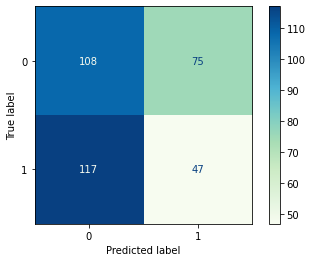

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [32]:
knn_cv_train = cross_val_score(knn, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.5106140839836492

In [33]:
knn_cv_test = cross_val_score(knn, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.5133333333333333

#### <font color = '#00C4FF'> SUPPORT VECTOR MACHINES


In [34]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.93      0.69       183
           1       0.62      0.12      0.20       164

    accuracy                           0.55       347
   macro avg       0.58      0.53      0.45       347
weighted avg       0.58      0.55      0.46       347



#### From a total of 347 observations, 191 were correctly classified

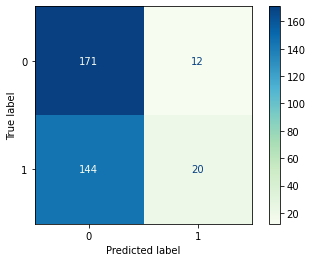

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [37]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5404496469713862

In [38]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.5274120082815734

#### <font color = '#00C4FF'> DECISION TREES


In [39]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       183
           1       0.51      0.55      0.53       164

    accuracy                           0.54       347
   macro avg       0.54      0.54      0.54       347
weighted avg       0.54      0.54      0.54       347



#### From a total of 347 observations, 186 were correctly classified 

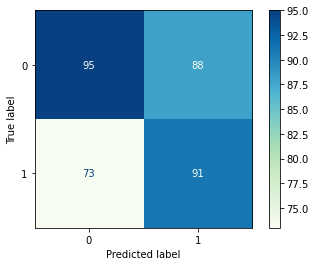

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [42]:
tree_cv_train = cross_val_score(tree, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.5114917849141151

In [43]:
tree_cv_test = cross_val_score(tree, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.49310924369747894

#### <font color = '#00C4FF'> RANDOM FOREST


In [44]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57       183
           1       0.50      0.47      0.49       164

    accuracy                           0.53       347
   macro avg       0.53      0.53      0.53       347
weighted avg       0.53      0.53      0.53       347



#### From a total of 347 observations, 184 were correctly classified  

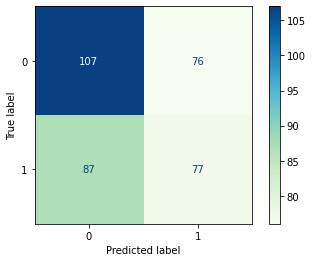

In [46]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [47]:
rf_cv_train = cross_val_score(rf, X_train, y_train, cv=5) 
rf_cv_train.mean()

0.5202712746191007

In [48]:
rf_cv_test = cross_val_score(rf, X_test, y_test, cv=5) 
rf_cv_test.mean()

0.5130434782608696

#### <font color = '#00C4FF'> MULTINOMIAL NAIVE BAYES


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

In [50]:
accuracy_score(y_test, y_pred)

0.5273775216138329

#### From a total of 347 observations, 183 were correctly classified 

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       183
           1       0.00      0.00      0.00       164

    accuracy                           0.53       347
   macro avg       0.26      0.50      0.35       347
weighted avg       0.28      0.53      0.36       347



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

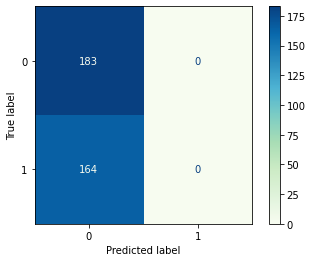

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [53]:
# Accuracy of decision tree on train:
naive.score(X_minmax_train, y_train)

0.5279383429672447

In [54]:
# Accuracy of decision tree on test:
naive.score(X_minmax_test, y_test)

0.5273775216138329

In [55]:
# Precision of decision tree on test:
precision_score(y_test, y_pred)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [56]:
# Recall or senzitivity of naive bayes multinomial on test:
recall_score(y_test, y_pred)

0.0

In [57]:
# AUC of naive bayes multinomial on test:
round(roc_auc_score(y_test, naive.predict_proba(X_minmax_test)[:,1]),5)

0.52802

In [58]:
# F1 score of naive bayes multinomial on test:
f1_score(y_test, y_pred)

0.0

In [59]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5279312920089618

In [60]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.5273949579831931

#### <font color = '#00C4FF'> BERNOULLI NAIVE BAYES

In [61]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66       183
           1       0.54      0.23      0.32       164

    accuracy                           0.54       347
   macro avg       0.54      0.53      0.49       347
weighted avg       0.54      0.54      0.50       347



#### From a total of 347 observations, 189 were correctly classified 

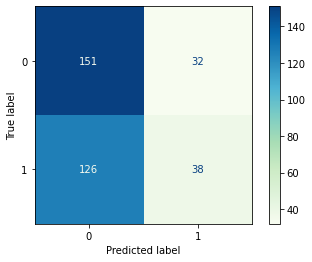

In [63]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [64]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.5385405053883315

In [65]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.547536231884058

#### <font color = '#00C4FF'> GAUSSIAN NAIVE BAYES

In [66]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.80      0.65       183
           1       0.53      0.24      0.33       164

    accuracy                           0.54       347
   macro avg       0.53      0.52      0.49       347
weighted avg       0.53      0.54      0.50       347



#### From a total of 347 observations, 187 were correctly classified 

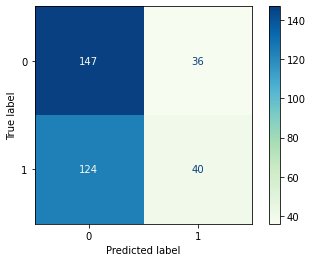

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [69]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.5289111854329245

In [70]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.5216149068322982

#### <font color = '#00C4FF'> ADAPTIVE BOOSTING


In [71]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       183
           1       0.48      0.43      0.45       164

    accuracy                           0.51       347
   macro avg       0.50      0.50      0.50       347
weighted avg       0.50      0.51      0.50       347



#### From a total of 347 observations, 176 were correctly classified 

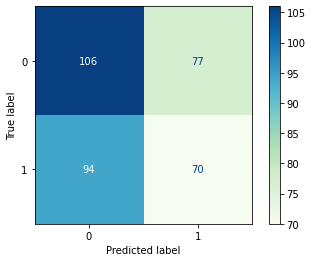

In [73]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [74]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.5288972500929023

In [75]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.5042650103519668

#### <font color = '#00C4FF'> eXTREME GRADIENT BOOSTING (XGB)


In [76]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       183
           1       0.51      0.51      0.51       164

    accuracy                           0.53       347
   macro avg       0.53      0.53      0.53       347
weighted avg       0.53      0.53      0.53       347



#### From a total of 347 observations, 185 were correctly classified 

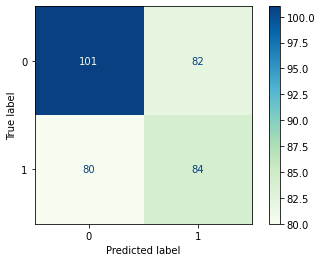

In [78]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [79]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.5192587752053771

In [80]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.4665546218487395

#### <font color = '#00C4FF'> CATBOOST

In [81]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.086467
0:	learn: 0.6913274	total: 828us	remaining: 82ms
1:	learn: 0.6895184	total: 1.47ms	remaining: 72.1ms
2:	learn: 0.6875071	total: 2.19ms	remaining: 70.9ms
3:	learn: 0.6862379	total: 2.81ms	remaining: 67.4ms
4:	learn: 0.6851015	total: 3.42ms	remaining: 65ms
5:	learn: 0.6834369	total: 4.2ms	remaining: 65.8ms
6:	learn: 0.6813386	total: 5.03ms	remaining: 66.9ms
7:	learn: 0.6803042	total: 6.39ms	remaining: 73.5ms
8:	learn: 0.6789913	total: 7.32ms	remaining: 74ms
9:	learn: 0.6776636	total: 8.06ms	remaining: 72.5ms
10:	learn: 0.6763334	total: 8.79ms	remaining: 71.1ms
11:	learn: 0.6749426	total: 9.57ms	remaining: 70.2ms
12:	learn: 0.6739308	total: 10.3ms	remaining: 68.6ms
13:	learn: 0.6729148	total: 11ms	remaining: 67.3ms
14:	learn: 0.6716409	total: 11.7ms	remaining: 66.5ms
15:	learn: 0.6706172	total: 12.4ms	remaining: 64.9ms
16:	learn: 0.6697871	total: 13ms	remaining: 63.3ms
17:	learn: 0.6688299	total: 13.6ms	remaining: 62ms
18:	learn: 0.6682263	total: 14.4ms	remai

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       183
           1       0.46      0.37      0.41       164

    accuracy                           0.50       347
   macro avg       0.49      0.49      0.49       347
weighted avg       0.49      0.50      0.49       347



#### From a total of 347 observations, 173 were correctly classified 

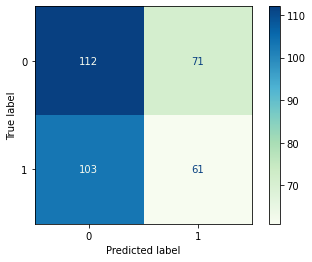

In [83]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [84]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.082656
0:	learn: 0.6917504	total: 970us	remaining: 96.1ms
1:	learn: 0.6901225	total: 1.61ms	remaining: 78.9ms
2:	learn: 0.6881043	total: 2.27ms	remaining: 73.3ms
3:	learn: 0.6872421	total: 2.94ms	remaining: 70.5ms
4:	learn: 0.6860530	total: 3.54ms	remaining: 67.3ms
5:	learn: 0.6843461	total: 4.39ms	remaining: 68.8ms
6:	learn: 0.6825525	total: 5.25ms	remaining: 69.8ms
7:	learn: 0.6816000	total: 5.95ms	remaining: 68.5ms
8:	learn: 0.6808709	total: 6.99ms	remaining: 70.6ms
9:	learn: 0.6797825	total: 7.87ms	remaining: 70.9ms
10:	learn: 0.6782460	total: 8.59ms	remaining: 69.5ms
11:	learn: 0.6773831	total: 9.52ms	remaining: 69.8ms
12:	learn: 0.6762858	total: 10.6ms	remaining: 70.8ms
13:	learn: 0.6750479	total: 11.6ms	remaining: 71.3ms
14:	learn: 0.6736799	total: 14.6ms	remaining: 82.6ms
15:	learn: 0.6719834	total: 15.6ms	remaining: 81.7ms
16:	learn: 0.6711448	total: 16.4ms	remaining: 80.3ms
17:	learn: 0.6704776	total: 17.2ms	remaining: 78.5ms
18:	learn: 0.6696538	total:

21:	learn: 0.6672921	total: 16.7ms	remaining: 59.3ms
22:	learn: 0.6662832	total: 17.8ms	remaining: 59.7ms
23:	learn: 0.6650268	total: 18.6ms	remaining: 58.9ms
24:	learn: 0.6642132	total: 19.5ms	remaining: 58.5ms
25:	learn: 0.6632441	total: 20.3ms	remaining: 57.8ms
26:	learn: 0.6622427	total: 21.1ms	remaining: 57ms
27:	learn: 0.6617088	total: 21.9ms	remaining: 56.3ms
28:	learn: 0.6611082	total: 22.8ms	remaining: 55.8ms
29:	learn: 0.6593355	total: 23.6ms	remaining: 55ms
30:	learn: 0.6578297	total: 24.5ms	remaining: 54.5ms
31:	learn: 0.6572719	total: 25.4ms	remaining: 54ms
32:	learn: 0.6564993	total: 26.4ms	remaining: 53.5ms
33:	learn: 0.6560818	total: 27.1ms	remaining: 52.6ms
34:	learn: 0.6552113	total: 28ms	remaining: 51.9ms
35:	learn: 0.6536737	total: 28.8ms	remaining: 51.2ms
36:	learn: 0.6526739	total: 29.7ms	remaining: 50.6ms
37:	learn: 0.6514013	total: 30.4ms	remaining: 49.7ms
38:	learn: 0.6507925	total: 31.2ms	remaining: 48.8ms
39:	learn: 0.6498917	total: 32ms	remaining: 48ms
40:	l

16:	learn: 0.6712179	total: 8.51ms	remaining: 41.6ms
17:	learn: 0.6706797	total: 9.07ms	remaining: 41.3ms
18:	learn: 0.6698249	total: 9.76ms	remaining: 41.6ms
19:	learn: 0.6692161	total: 10.6ms	remaining: 42.4ms
20:	learn: 0.6686029	total: 11.1ms	remaining: 41.9ms
21:	learn: 0.6678681	total: 11.6ms	remaining: 41.3ms
22:	learn: 0.6670698	total: 12.2ms	remaining: 40.9ms
23:	learn: 0.6661525	total: 12.7ms	remaining: 40.2ms
24:	learn: 0.6651958	total: 13.1ms	remaining: 39.4ms
25:	learn: 0.6642463	total: 13.6ms	remaining: 38.6ms
26:	learn: 0.6630503	total: 14.1ms	remaining: 38.1ms
27:	learn: 0.6620823	total: 14.6ms	remaining: 37.4ms
28:	learn: 0.6615524	total: 15ms	remaining: 36.8ms
29:	learn: 0.6608727	total: 15.5ms	remaining: 36.3ms
30:	learn: 0.6599377	total: 16.1ms	remaining: 35.8ms
31:	learn: 0.6588256	total: 16.5ms	remaining: 35.1ms
32:	learn: 0.6574619	total: 17.1ms	remaining: 34.7ms
33:	learn: 0.6559425	total: 17.6ms	remaining: 34.1ms
34:	learn: 0.6549250	total: 18ms	remaining: 33.5

0:	learn: 0.6915825	total: 732us	remaining: 72.5ms
1:	learn: 0.6896306	total: 1.57ms	remaining: 77ms
2:	learn: 0.6874242	total: 2.15ms	remaining: 69.6ms
3:	learn: 0.6857828	total: 2.75ms	remaining: 66.1ms
4:	learn: 0.6842825	total: 3.3ms	remaining: 62.7ms
5:	learn: 0.6819544	total: 3.76ms	remaining: 59ms
6:	learn: 0.6798281	total: 4.26ms	remaining: 56.6ms
7:	learn: 0.6786579	total: 4.71ms	remaining: 54.2ms
8:	learn: 0.6769010	total: 5.18ms	remaining: 52.4ms
9:	learn: 0.6751137	total: 5.64ms	remaining: 50.8ms
10:	learn: 0.6741950	total: 6.1ms	remaining: 49.3ms
11:	learn: 0.6729541	total: 6.61ms	remaining: 48.5ms
12:	learn: 0.6718619	total: 7.03ms	remaining: 47ms
13:	learn: 0.6702229	total: 7.49ms	remaining: 46ms
14:	learn: 0.6688069	total: 7.92ms	remaining: 44.9ms
15:	learn: 0.6680138	total: 8.38ms	remaining: 44ms
16:	learn: 0.6670257	total: 8.88ms	remaining: 43.3ms
17:	learn: 0.6659373	total: 9.31ms	remaining: 42.4ms
18:	learn: 0.6651293	total: 9.85ms	remaining: 42ms
19:	learn: 0.66440

62:	learn: 0.6345448	total: 30.3ms	remaining: 17.8ms
63:	learn: 0.6335151	total: 31ms	remaining: 17.5ms
64:	learn: 0.6328687	total: 31.7ms	remaining: 17.1ms
65:	learn: 0.6320575	total: 32.3ms	remaining: 16.6ms
66:	learn: 0.6316359	total: 32.9ms	remaining: 16.2ms
67:	learn: 0.6309936	total: 33.5ms	remaining: 15.8ms
68:	learn: 0.6299745	total: 34ms	remaining: 15.3ms
69:	learn: 0.6291528	total: 34.6ms	remaining: 14.8ms
70:	learn: 0.6283130	total: 35.1ms	remaining: 14.3ms
71:	learn: 0.6278849	total: 35.5ms	remaining: 13.8ms
72:	learn: 0.6276127	total: 36.1ms	remaining: 13.4ms
73:	learn: 0.6268034	total: 36.8ms	remaining: 12.9ms
74:	learn: 0.6260948	total: 37.3ms	remaining: 12.4ms
75:	learn: 0.6255527	total: 38ms	remaining: 12ms
76:	learn: 0.6251301	total: 38.5ms	remaining: 11.5ms
77:	learn: 0.6246460	total: 39.1ms	remaining: 11ms
78:	learn: 0.6242581	total: 39.9ms	remaining: 10.6ms
79:	learn: 0.6235837	total: 40.6ms	remaining: 10.1ms
80:	learn: 0.6228140	total: 41.2ms	remaining: 9.66ms
81:

0.5037808065720688

In [85]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.051753
0:	learn: 0.6909469	total: 660us	remaining: 65.4ms
1:	learn: 0.6884198	total: 1.16ms	remaining: 57ms
2:	learn: 0.6860961	total: 1.56ms	remaining: 50.5ms
3:	learn: 0.6840069	total: 1.97ms	remaining: 47.3ms
4:	learn: 0.6824492	total: 2.38ms	remaining: 45.3ms
5:	learn: 0.6805730	total: 2.78ms	remaining: 43.6ms
6:	learn: 0.6780391	total: 3.18ms	remaining: 42.3ms
7:	learn: 0.6761798	total: 3.7ms	remaining: 42.5ms
8:	learn: 0.6740453	total: 4.13ms	remaining: 41.8ms
9:	learn: 0.6711007	total: 4.53ms	remaining: 40.7ms
10:	learn: 0.6692515	total: 4.94ms	remaining: 40ms
11:	learn: 0.6675101	total: 5.35ms	remaining: 39.2ms
12:	learn: 0.6664098	total: 5.75ms	remaining: 38.5ms
13:	learn: 0.6644658	total: 6.16ms	remaining: 37.8ms
14:	learn: 0.6634272	total: 6.54ms	remaining: 37ms
15:	learn: 0.6611751	total: 6.99ms	remaining: 36.7ms
16:	learn: 0.6600350	total: 7.39ms	remaining: 36.1ms
17:	learn: 0.6579069	total: 7.77ms	remaining: 35.4ms
18:	learn: 0.6568462	total: 8.19ms

Learning rate set to 0.051753
0:	learn: 0.6910066	total: 394us	remaining: 39ms
1:	learn: 0.6889963	total: 802us	remaining: 39.3ms
2:	learn: 0.6874228	total: 1.28ms	remaining: 41.3ms
3:	learn: 0.6855613	total: 1.69ms	remaining: 40.5ms
4:	learn: 0.6834326	total: 2.15ms	remaining: 40.9ms
5:	learn: 0.6810451	total: 2.55ms	remaining: 40ms
6:	learn: 0.6784100	total: 2.98ms	remaining: 39.5ms
7:	learn: 0.6766286	total: 3.4ms	remaining: 39.1ms
8:	learn: 0.6754865	total: 3.83ms	remaining: 38.7ms
9:	learn: 0.6734224	total: 4.22ms	remaining: 38ms
10:	learn: 0.6719208	total: 4.63ms	remaining: 37.5ms
11:	learn: 0.6702844	total: 5.11ms	remaining: 37.5ms
12:	learn: 0.6682897	total: 5.52ms	remaining: 36.9ms
13:	learn: 0.6660422	total: 5.91ms	remaining: 36.3ms
14:	learn: 0.6651786	total: 6.33ms	remaining: 35.9ms
15:	learn: 0.6630890	total: 6.72ms	remaining: 35.3ms
16:	learn: 0.6623342	total: 7.12ms	remaining: 34.8ms
17:	learn: 0.6605302	total: 7.59ms	remaining: 34.6ms
18:	learn: 0.6587377	total: 7.99ms	

64:	learn: 0.5985925	total: 33ms	remaining: 17.8ms
65:	learn: 0.5981104	total: 33.8ms	remaining: 17.4ms
66:	learn: 0.5971855	total: 34.5ms	remaining: 17ms
67:	learn: 0.5964223	total: 35.1ms	remaining: 16.5ms
68:	learn: 0.5946438	total: 35.8ms	remaining: 16.1ms
69:	learn: 0.5938466	total: 36.2ms	remaining: 15.5ms
70:	learn: 0.5928343	total: 36.6ms	remaining: 15ms
71:	learn: 0.5918382	total: 37ms	remaining: 14.4ms
72:	learn: 0.5907842	total: 37.6ms	remaining: 13.9ms
73:	learn: 0.5895988	total: 38.1ms	remaining: 13.4ms
74:	learn: 0.5885040	total: 38.6ms	remaining: 12.9ms
75:	learn: 0.5878435	total: 39ms	remaining: 12.3ms
76:	learn: 0.5871730	total: 39.4ms	remaining: 11.8ms
77:	learn: 0.5861268	total: 39.9ms	remaining: 11.2ms
78:	learn: 0.5848496	total: 40.2ms	remaining: 10.7ms
79:	learn: 0.5837915	total: 40.6ms	remaining: 10.2ms
80:	learn: 0.5829373	total: 41.1ms	remaining: 9.63ms
81:	learn: 0.5821619	total: 41.5ms	remaining: 9.11ms
82:	learn: 0.5812760	total: 41.9ms	remaining: 8.58ms
83:

65:	learn: 0.6035126	total: 30.1ms	remaining: 15.5ms
66:	learn: 0.6028317	total: 30.9ms	remaining: 15.2ms
67:	learn: 0.6020922	total: 31.5ms	remaining: 14.8ms
68:	learn: 0.6016193	total: 32.1ms	remaining: 14.4ms
69:	learn: 0.6007277	total: 32.7ms	remaining: 14ms
70:	learn: 0.5992452	total: 33.2ms	remaining: 13.5ms
71:	learn: 0.5987725	total: 33.7ms	remaining: 13.1ms
72:	learn: 0.5981860	total: 34.2ms	remaining: 12.6ms
73:	learn: 0.5975806	total: 34.6ms	remaining: 12.2ms
74:	learn: 0.5969242	total: 35ms	remaining: 11.7ms
75:	learn: 0.5959787	total: 35.4ms	remaining: 11.2ms
76:	learn: 0.5956295	total: 35.9ms	remaining: 10.7ms
77:	learn: 0.5944448	total: 36.3ms	remaining: 10.2ms
78:	learn: 0.5937504	total: 36.8ms	remaining: 9.78ms
79:	learn: 0.5932127	total: 37.2ms	remaining: 9.3ms
80:	learn: 0.5923794	total: 37.6ms	remaining: 8.83ms
81:	learn: 0.5910234	total: 38ms	remaining: 8.35ms
82:	learn: 0.5902615	total: 38.5ms	remaining: 7.88ms
83:	learn: 0.5894423	total: 38.9ms	remaining: 7.4ms
8

35:	learn: 0.6365425	total: 16.4ms	remaining: 29.2ms
36:	learn: 0.6355334	total: 17ms	remaining: 29ms
37:	learn: 0.6336464	total: 17.6ms	remaining: 28.8ms
38:	learn: 0.6324032	total: 18.3ms	remaining: 28.7ms
39:	learn: 0.6312887	total: 18.9ms	remaining: 28.3ms
40:	learn: 0.6302041	total: 19.4ms	remaining: 27.9ms
41:	learn: 0.6293986	total: 19.8ms	remaining: 27.3ms
42:	learn: 0.6282218	total: 20.2ms	remaining: 26.8ms
43:	learn: 0.6270673	total: 20.6ms	remaining: 26.3ms
44:	learn: 0.6258945	total: 21.1ms	remaining: 25.8ms
45:	learn: 0.6245227	total: 21.5ms	remaining: 25.2ms
46:	learn: 0.6235074	total: 22ms	remaining: 24.9ms
47:	learn: 0.6221748	total: 22.5ms	remaining: 24.4ms
48:	learn: 0.6216237	total: 23ms	remaining: 24ms
49:	learn: 0.6209829	total: 23.5ms	remaining: 23.5ms
50:	learn: 0.6201697	total: 23.9ms	remaining: 23ms
51:	learn: 0.6189122	total: 24.3ms	remaining: 22.5ms
52:	learn: 0.6175370	total: 24.9ms	remaining: 22.1ms
53:	learn: 0.6163225	total: 25.5ms	remaining: 21.7ms
54:	l

49:	learn: 0.6211660	total: 20.8ms	remaining: 20.8ms
50:	learn: 0.6199446	total: 21.3ms	remaining: 20.5ms
51:	learn: 0.6192255	total: 22ms	remaining: 20.3ms
52:	learn: 0.6182472	total: 22.5ms	remaining: 20ms
53:	learn: 0.6171619	total: 23.1ms	remaining: 19.7ms
54:	learn: 0.6162053	total: 23.6ms	remaining: 19.3ms
55:	learn: 0.6153080	total: 24.1ms	remaining: 18.9ms
56:	learn: 0.6145307	total: 24.5ms	remaining: 18.5ms
57:	learn: 0.6136066	total: 24.9ms	remaining: 18ms
58:	learn: 0.6126098	total: 25.3ms	remaining: 17.6ms
59:	learn: 0.6118800	total: 25.7ms	remaining: 17.1ms
60:	learn: 0.6111515	total: 26.2ms	remaining: 16.7ms
61:	learn: 0.6104430	total: 26.5ms	remaining: 16.3ms
62:	learn: 0.6094983	total: 27ms	remaining: 15.8ms
63:	learn: 0.6084329	total: 27.4ms	remaining: 15.4ms
64:	learn: 0.6070038	total: 27.9ms	remaining: 15ms
65:	learn: 0.6062889	total: 28.3ms	remaining: 14.6ms
66:	learn: 0.6055297	total: 28.7ms	remaining: 14.1ms
67:	learn: 0.6044396	total: 29.2ms	remaining: 13.7ms
68:

0.5189915966386554

#### <font color = '#00C4FF'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)


In [86]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       183
           1       0.48      0.46      0.47       164

    accuracy                           0.51       347
   macro avg       0.51      0.51      0.51       347
weighted avg       0.51      0.51      0.51       347



#### From a total of 347 observations, 178 were correctly classified 

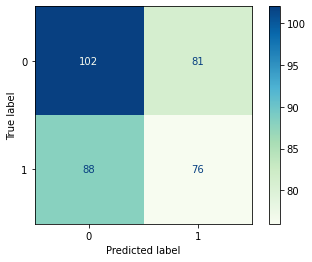

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [89]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.5144604182225542

In [90]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.5047899159663866

##### <font color = '#FFF5B8'>CREATE LAG 1 VARIABLE FOR VADER SENTIMENT COMPOUND



In [91]:
dogecoin

,label_rt_Doge,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2017-11-09,0,-0.113150,-0.214286,0.170000,0.110000,0.720000
2017-11-10,0,0.318200,1.000000,0.000000,1.000000,0.000000
2017-11-13,1,0.624900,1.000000,0.000000,0.175000,0.825000
2017-11-14,0,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-15,1,-0.462400,-0.511654,0.362500,0.109000,0.528750
...,...,...,...,...,...,...
2023-05-08,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,1,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,1,0.181463,0.762771,0.036657,0.276943,0.629229


In [92]:
lag = 1
dogecoin['vader_clean_compound_lag'] = dogecoin['vader_clean_compound'].shift(lag)
dogecoin.dropna(inplace=True)
dogecoin.head()

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1675/3727465432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogecoin['vader_clean_compound_lag'] = dogecoin['vader_clean_compound'].shift(lag)
/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1675/3727465432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogecoin.dropna(inplace=True)


,label_rt_Doge,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral,vader_clean_compound_lag
date,,,,,,,
2017-11-10,0,0.3182,1.000000,0.0000,1.000,0.00000,-0.11315
2017-11-13,1,0.6249,1.000000,0.0000,0.175,0.82500,0.31820
2017-11-14,0,0.0000,0.000000,0.0000,0.000,0.00000,0.62490
2017-11-15,1,-0.4624,-0.511654,0.3625,0.109,0.52875,0.00000
2017-11-16,1,0.0000,0.000000,0.0000,0.000,0.00000,-0.46240


In [93]:
X = dogecoin.drop(['label_rt_Doge','vader_clean_compound'], axis = 1) 
y = dogecoin['label_rt_Doge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [94]:
X_train.shape

(1038, 5)

In [95]:
X_test.shape

(346, 5)

#### Create a summary for all models used in analysis

In [96]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [97]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    
    row_index+=1

Learning rate set to 0.086467
0:	learn: 0.6913793	total: 673us	remaining: 66.7ms
1:	learn: 0.6893587	total: 1.44ms	remaining: 70.7ms
2:	learn: 0.6866257	total: 2.05ms	remaining: 66.4ms
3:	learn: 0.6848216	total: 2.66ms	remaining: 64ms
4:	learn: 0.6820756	total: 3.4ms	remaining: 64.5ms
5:	learn: 0.6800907	total: 4.27ms	remaining: 66.8ms
6:	learn: 0.6780892	total: 5.07ms	remaining: 67.3ms
7:	learn: 0.6765891	total: 5.76ms	remaining: 66.3ms
8:	learn: 0.6753914	total: 6.41ms	remaining: 64.8ms
9:	learn: 0.6740656	total: 7.1ms	remaining: 63.9ms
10:	learn: 0.6726611	total: 7.87ms	remaining: 63.7ms
11:	learn: 0.6710747	total: 8.65ms	remaining: 63.4ms
12:	learn: 0.6701755	total: 9.23ms	remaining: 61.8ms
13:	learn: 0.6686105	total: 9.83ms	remaining: 60.4ms
14:	learn: 0.6678843	total: 10.3ms	remaining: 58.6ms
15:	learn: 0.6667100	total: 11ms	remaining: 57.7ms
16:	learn: 0.6657384	total: 11.7ms	remaining: 56.9ms
17:	learn: 0.6647248	total: 12.3ms	remaining: 56ms
18:	learn: 0.6623295	total: 12.9ms	

In [98]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
3,CalibratedClassifierCV,0.5443,0.5260,0.485714,0.104294,0.53919,0.171717
10,BernoulliNB,0.5337,0.5549,0.573770,0.214724,0.53265,0.312500
6,LogisticRegression,0.5424,0.5318,0.510204,0.153374,0.52749,0.235849
9,LGBMClassifier,0.9422,0.5029,0.472050,0.466258,0.51713,0.469136
2,GaussianNB,0.5405,0.5318,0.505747,0.269939,0.51522,0.352000
0,AdaBoostClassifier,0.6416,0.5058,0.466102,0.337423,0.50969,0.391459
7,KNeighborsClassifier,0.7447,0.4942,0.459459,0.417178,0.50890,0.437299
8,CatBoostClassifier,0.7486,0.4884,0.445312,0.349693,0.50372,0.391753
5,XGBClassifier,0.9499,0.5173,0.487952,0.496933,0.50302,0.492401
1,RandomForestClassifier,0.9875,0.4798,0.437956,0.368098,0.49983,0.400000


#### <font color = '#FFE7A0'> LOGISTIC REGRESSION


In [99]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.87      0.66       183
           1       0.51      0.15      0.24       163

    accuracy                           0.53       346
   macro avg       0.52      0.51      0.45       346
weighted avg       0.52      0.53      0.46       346



#### From a total of 346 observations, 184 were correctly classified  

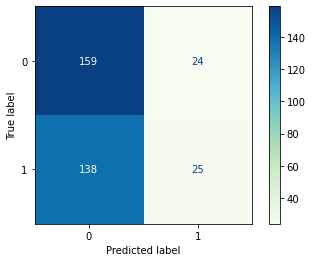

In [101]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [102]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.5337421033073207

In [103]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5548654244306418

#### <font color = '#FFE7A0'> K-NEAREST NEIGHBORS


In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       183
           1       0.46      0.42      0.44       163

    accuracy                           0.49       346
   macro avg       0.49      0.49      0.49       346
weighted avg       0.49      0.49      0.49       346



#### From a total of 346 observations, 171 were correctly classified 

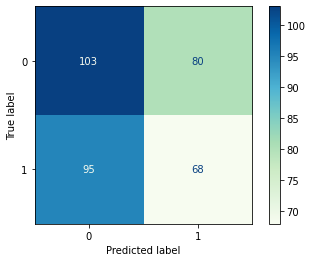

In [106]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [107]:
knn_cv_train = cross_val_score(knn, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.5250046451133408

In [108]:
knn_cv_test = cross_val_score(knn, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.5546997929606625

#### <font color = '#FFE7A0'> SUPPORT VECTOR MACHINES


In [109]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.91      0.67       183
           1       0.53      0.11      0.18       163

    accuracy                           0.53       346
   macro avg       0.53      0.51      0.43       346
weighted avg       0.53      0.53      0.44       346



#### From a total of 346 observations, 185 were correctly classified 

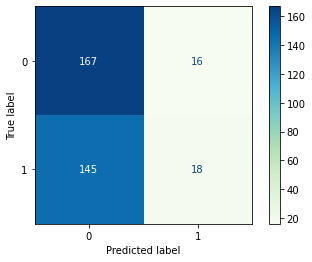

In [111]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [112]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5414715719063545

In [113]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.5433126293995859

#### <font color = '#FFE7A0'> DECISION TREES


In [114]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53       183
           1       0.45      0.42      0.44       163

    accuracy                           0.49       346
   macro avg       0.48      0.48      0.48       346
weighted avg       0.49      0.49      0.49       346



#### From a total of 346 observations, 169 were correctly classified

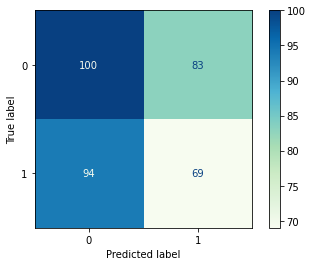

In [116]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [117]:
tree_cv_train = cross_val_score(tree, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.5037994772218074

In [118]:
tree_cv_test = cross_val_score(tree, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.5605042016806723

#### <font color = '#FFE7A0'> RANDOM FOREST


In [119]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       183
           1       0.44      0.37      0.40       163

    accuracy                           0.48       346
   macro avg       0.47      0.47      0.47       346
weighted avg       0.47      0.48      0.47       346



#### From a total of 346 observations, 166 were correctly classified 

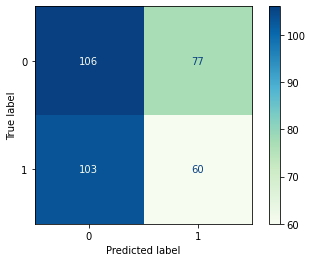

In [121]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [122]:
rf_cv_train = cross_val_score(rf, X_train, y_train, cv=5) 
rf_cv_train.mean()

0.5201783723522854

In [123]:
rf_cv_test = cross_val_score(rf, X_test, y_test, cv=5) 
rf_cv_test.mean()

0.5375569358178054

#### <font color = '#FFE7A0'> MULTINOMIAL NAIVE BAYES

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

In [125]:
accuracy_score(y_test, y_pred)

0.5289017341040463

#### From a total of 346 observations, 183 were correctly classified  

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       183
           1       0.00      0.00      0.00       163

    accuracy                           0.53       346
   macro avg       0.26      0.50      0.35       346
weighted avg       0.28      0.53      0.37       346



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

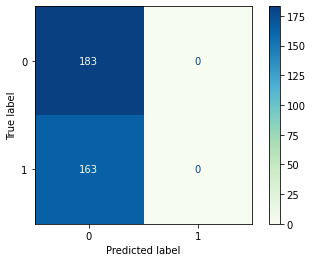

In [127]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [128]:
# Accuracy of decision tree on train:
naive.score(X_minmax_train, y_train)

0.5279383429672447

In [129]:
# Accuracy of decision tree on test:
naive.score(X_minmax_test, y_test)

0.5289017341040463

In [130]:
# Precision of decision tree on test:
precision_score(y_test, y_pred)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [131]:
# Recall or senzitivity of naive bayes multinomial on test:
recall_score(y_test, y_pred)

0.0

In [132]:
# AUC of naive bayes multinomial on test:
round(roc_auc_score(y_test, naive.predict_proba(X_minmax_test)[:,1]),5)

0.50761

In [133]:
# F1 score of naive bayes multinomial on test:
f1_score(y_test, y_pred)

0.0

In [134]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5269697535474235

In [135]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.52890756302521

#### <font color = '#FFE7A0'> BERNOULLI NAIVE BAYES

In [136]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67       183
           1       0.57      0.21      0.31       163

    accuracy                           0.55       346
   macro avg       0.56      0.54      0.49       346
weighted avg       0.56      0.55      0.50       346



#### From a total of 346 observations, 192 were correctly classified  

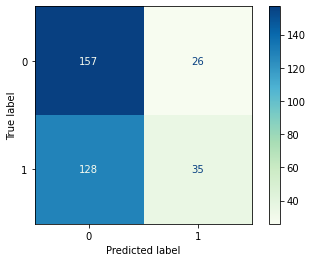

In [138]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [139]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.5231280193236715

In [140]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.5577639751552795

#### <font color = '#FFE7A0'> GAUSSIAN NAIVE BAYES

In [141]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.77      0.63       183
           1       0.51      0.27      0.35       163

    accuracy                           0.53       346
   macro avg       0.52      0.52      0.49       346
weighted avg       0.52      0.53      0.50       346



#### From a total of 346 observations, 184 were correctly classified 

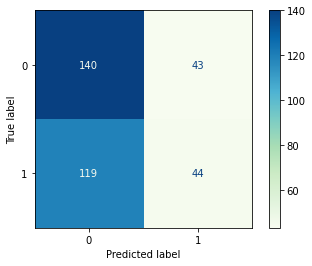

In [143]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [144]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.5346897064288368

In [145]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.5432712215320911

#### <font color = '#FFE7A0'> ADAPTIVE BOOSTING


In [146]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.66      0.58       183
           1       0.47      0.34      0.39       163

    accuracy                           0.51       346
   macro avg       0.50      0.50      0.49       346
weighted avg       0.50      0.51      0.49       346



#### From a total of 346 observations, 175 were correctly classified

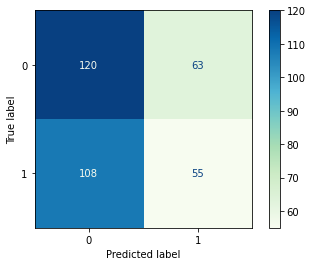

In [148]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [149]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.519272575250836

In [150]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.5490683229813665

#### <font color = '#FFE7A0'> eXTREME GRADIENT BOOSTING (XGB)


In [151]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       183
           1       0.49      0.50      0.49       163

    accuracy                           0.52       346
   macro avg       0.52      0.52      0.52       346
weighted avg       0.52      0.52      0.52       346



#### From a total of 346 observations, 179 were correctly classified 

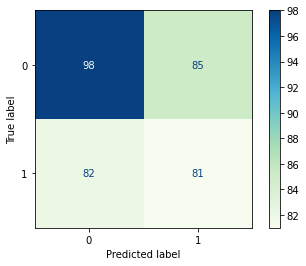

In [153]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [154]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.5009522031366691

In [155]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.520252100840336

#### <font color = '#FFE7A0'> CATBOOST


In [156]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.086467
0:	learn: 0.6913793	total: 680us	remaining: 67.4ms
1:	learn: 0.6893587	total: 1.39ms	remaining: 68ms
2:	learn: 0.6866257	total: 2.07ms	remaining: 66.9ms
3:	learn: 0.6848216	total: 2.64ms	remaining: 63.3ms
4:	learn: 0.6820756	total: 3.39ms	remaining: 64.5ms
5:	learn: 0.6800907	total: 4.06ms	remaining: 63.6ms
6:	learn: 0.6780892	total: 4.78ms	remaining: 63.5ms
7:	learn: 0.6765891	total: 5.5ms	remaining: 63.2ms
8:	learn: 0.6753914	total: 6.22ms	remaining: 62.9ms
9:	learn: 0.6740656	total: 6.93ms	remaining: 62.4ms
10:	learn: 0.6726611	total: 7.64ms	remaining: 61.8ms
11:	learn: 0.6710747	total: 8.39ms	remaining: 61.5ms
12:	learn: 0.6701755	total: 9.03ms	remaining: 60.4ms
13:	learn: 0.6686105	total: 9.77ms	remaining: 60ms
14:	learn: 0.6678843	total: 10.5ms	remaining: 59.6ms
15:	learn: 0.6667100	total: 11.3ms	remaining: 59.3ms
16:	learn: 0.6657384	total: 11.9ms	remaining: 58.3ms
17:	learn: 0.6647248	total: 12.6ms	remaining: 57.4ms
18:	learn: 0.6623295	total: 13.3

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56       183
           1       0.45      0.35      0.39       163

    accuracy                           0.49       346
   macro avg       0.48      0.48      0.48       346
weighted avg       0.48      0.49      0.48       346



#### From a total of 346 observations, 169 were correctly classified

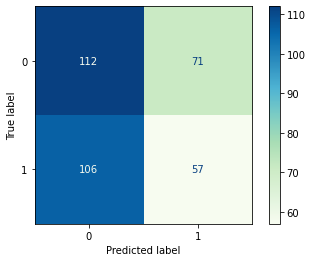

In [158]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [159]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.082656
0:	learn: 0.6901767	total: 731us	remaining: 72.5ms
1:	learn: 0.6876448	total: 1.44ms	remaining: 70.6ms
2:	learn: 0.6845991	total: 2.37ms	remaining: 76.7ms
3:	learn: 0.6835140	total: 3.21ms	remaining: 76.9ms
4:	learn: 0.6815630	total: 4.16ms	remaining: 79.1ms
5:	learn: 0.6791338	total: 5.11ms	remaining: 80.1ms
6:	learn: 0.6769541	total: 8.28ms	remaining: 110ms
7:	learn: 0.6753220	total: 9.34ms	remaining: 107ms
8:	learn: 0.6738899	total: 10.3ms	remaining: 104ms
9:	learn: 0.6719516	total: 11ms	remaining: 98.7ms
10:	learn: 0.6701865	total: 11.8ms	remaining: 95.3ms
11:	learn: 0.6697259	total: 12.6ms	remaining: 92.5ms
12:	learn: 0.6681903	total: 13.7ms	remaining: 92ms
13:	learn: 0.6664678	total: 14.6ms	remaining: 89.6ms
14:	learn: 0.6657015	total: 15.6ms	remaining: 88.3ms
15:	learn: 0.6635154	total: 16.3ms	remaining: 85.7ms
16:	learn: 0.6625167	total: 17.4ms	remaining: 84.8ms
17:	learn: 0.6615395	total: 18.3ms	remaining: 83.3ms
18:	learn: 0.6606594	total: 19.1ms

17:	learn: 0.6613784	total: 11.1ms	remaining: 50.7ms
18:	learn: 0.6600258	total: 12.4ms	remaining: 52.7ms
19:	learn: 0.6586365	total: 13.4ms	remaining: 53.5ms
20:	learn: 0.6579944	total: 14.3ms	remaining: 53.9ms
21:	learn: 0.6563065	total: 15.3ms	remaining: 54.2ms
22:	learn: 0.6557793	total: 16.1ms	remaining: 53.9ms
23:	learn: 0.6544563	total: 17.1ms	remaining: 54.2ms
24:	learn: 0.6534888	total: 18.1ms	remaining: 54.3ms
25:	learn: 0.6519825	total: 18.9ms	remaining: 53.9ms
26:	learn: 0.6510337	total: 19.8ms	remaining: 53.5ms
27:	learn: 0.6496464	total: 20.6ms	remaining: 53ms
28:	learn: 0.6490112	total: 21.3ms	remaining: 52.2ms
29:	learn: 0.6486168	total: 22.1ms	remaining: 51.6ms
30:	learn: 0.6481025	total: 22.9ms	remaining: 50.9ms
31:	learn: 0.6469529	total: 23.8ms	remaining: 50.6ms
32:	learn: 0.6459909	total: 24.8ms	remaining: 50.3ms
33:	learn: 0.6454153	total: 25.5ms	remaining: 49.6ms
34:	learn: 0.6445504	total: 26.4ms	remaining: 49ms
35:	learn: 0.6434133	total: 27.1ms	remaining: 48.2

16:	learn: 0.6688204	total: 9.28ms	remaining: 45.3ms
17:	learn: 0.6677677	total: 9.85ms	remaining: 44.9ms
18:	learn: 0.6671530	total: 10.6ms	remaining: 45ms
19:	learn: 0.6660503	total: 11.1ms	remaining: 44.6ms
20:	learn: 0.6649733	total: 11.8ms	remaining: 44.4ms
21:	learn: 0.6636049	total: 12.3ms	remaining: 43.7ms
22:	learn: 0.6632492	total: 12.8ms	remaining: 42.9ms
23:	learn: 0.6620174	total: 13.4ms	remaining: 42.4ms
24:	learn: 0.6608596	total: 13.9ms	remaining: 41.6ms
25:	learn: 0.6591438	total: 14.4ms	remaining: 41ms
26:	learn: 0.6580651	total: 14.9ms	remaining: 40.2ms
27:	learn: 0.6571890	total: 15.5ms	remaining: 39.8ms
28:	learn: 0.6561395	total: 16ms	remaining: 39.2ms
29:	learn: 0.6552451	total: 16.6ms	remaining: 38.7ms
30:	learn: 0.6540880	total: 17ms	remaining: 37.9ms
31:	learn: 0.6533371	total: 17.7ms	remaining: 37.6ms
32:	learn: 0.6526299	total: 18.2ms	remaining: 36.9ms
33:	learn: 0.6517479	total: 19ms	remaining: 36.9ms
34:	learn: 0.6505621	total: 19.5ms	remaining: 36.3ms
35:

98:	learn: 0.5869803	total: 55.5ms	remaining: 560us
99:	learn: 0.5864320	total: 56.3ms	remaining: 0us
Learning rate set to 0.082656
0:	learn: 0.6909532	total: 483us	remaining: 47.8ms
1:	learn: 0.6896439	total: 1.09ms	remaining: 53.3ms
2:	learn: 0.6877870	total: 1.68ms	remaining: 54.3ms
3:	learn: 0.6859658	total: 2.12ms	remaining: 51ms
4:	learn: 0.6846556	total: 2.6ms	remaining: 49.4ms
5:	learn: 0.6825383	total: 3.06ms	remaining: 47.9ms
6:	learn: 0.6802978	total: 3.54ms	remaining: 47ms
7:	learn: 0.6787334	total: 4.05ms	remaining: 46.6ms
8:	learn: 0.6776707	total: 4.54ms	remaining: 45.9ms
9:	learn: 0.6757058	total: 5.24ms	remaining: 47.2ms
10:	learn: 0.6746631	total: 6.01ms	remaining: 48.7ms
11:	learn: 0.6730901	total: 6.7ms	remaining: 49.1ms
12:	learn: 0.6722578	total: 7.33ms	remaining: 49ms
13:	learn: 0.6710363	total: 8.03ms	remaining: 49.3ms
14:	learn: 0.6701020	total: 8.7ms	remaining: 49.3ms
15:	learn: 0.6682925	total: 9.3ms	remaining: 48.8ms
16:	learn: 0.6674458	total: 9.95ms	remain

38:	learn: 0.6415715	total: 21.8ms	remaining: 34.1ms
39:	learn: 0.6411359	total: 22.5ms	remaining: 33.7ms
40:	learn: 0.6401040	total: 23.2ms	remaining: 33.3ms
41:	learn: 0.6392643	total: 23.7ms	remaining: 32.8ms
42:	learn: 0.6383659	total: 24.2ms	remaining: 32.1ms
43:	learn: 0.6374407	total: 24.7ms	remaining: 31.5ms
44:	learn: 0.6356831	total: 25.2ms	remaining: 30.8ms
45:	learn: 0.6344924	total: 25.7ms	remaining: 30.1ms
46:	learn: 0.6331006	total: 26.2ms	remaining: 29.6ms
47:	learn: 0.6323807	total: 26.7ms	remaining: 28.9ms
48:	learn: 0.6319491	total: 27.2ms	remaining: 28.3ms
49:	learn: 0.6313588	total: 27.6ms	remaining: 27.6ms
50:	learn: 0.6301467	total: 28.1ms	remaining: 27ms
51:	learn: 0.6298070	total: 28.6ms	remaining: 26.4ms
52:	learn: 0.6288832	total: 29.2ms	remaining: 25.9ms
53:	learn: 0.6277510	total: 29.6ms	remaining: 25.2ms
54:	learn: 0.6270252	total: 30.2ms	remaining: 24.7ms
55:	learn: 0.6258445	total: 30.9ms	remaining: 24.3ms
56:	learn: 0.6251213	total: 31.7ms	remaining: 23

0.5066840926064227

In [160]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.051682
0:	learn: 0.6913175	total: 575us	remaining: 57ms
1:	learn: 0.6891009	total: 988us	remaining: 48.4ms
2:	learn: 0.6865756	total: 1.4ms	remaining: 45.4ms
3:	learn: 0.6849667	total: 1.83ms	remaining: 43.9ms
4:	learn: 0.6829547	total: 2.27ms	remaining: 43ms
5:	learn: 0.6811767	total: 2.67ms	remaining: 41.8ms
6:	learn: 0.6789430	total: 3.1ms	remaining: 41.2ms
7:	learn: 0.6768792	total: 3.49ms	remaining: 40.2ms
8:	learn: 0.6755116	total: 3.92ms	remaining: 39.7ms
9:	learn: 0.6736096	total: 4.35ms	remaining: 39.2ms
10:	learn: 0.6714693	total: 4.76ms	remaining: 38.6ms
11:	learn: 0.6697431	total: 5.17ms	remaining: 37.9ms
12:	learn: 0.6676535	total: 5.57ms	remaining: 37.3ms
13:	learn: 0.6653655	total: 6ms	remaining: 36.9ms
14:	learn: 0.6635260	total: 6.41ms	remaining: 36.3ms
15:	learn: 0.6616485	total: 6.84ms	remaining: 35.9ms
16:	learn: 0.6603426	total: 7.23ms	remaining: 35.3ms
17:	learn: 0.6591103	total: 7.65ms	remaining: 34.9ms
18:	learn: 0.6572150	total: 8.08ms	re

86:	learn: 0.5803455	total: 39.5ms	remaining: 5.9ms
87:	learn: 0.5793756	total: 40ms	remaining: 5.46ms
88:	learn: 0.5785423	total: 40.6ms	remaining: 5.01ms
89:	learn: 0.5776725	total: 41.1ms	remaining: 4.56ms
90:	learn: 0.5762090	total: 41.7ms	remaining: 4.13ms
91:	learn: 0.5750155	total: 42.3ms	remaining: 3.68ms
92:	learn: 0.5735913	total: 42.9ms	remaining: 3.23ms
93:	learn: 0.5724762	total: 43.3ms	remaining: 2.76ms
94:	learn: 0.5710022	total: 43.8ms	remaining: 2.3ms
95:	learn: 0.5703931	total: 44.2ms	remaining: 1.84ms
96:	learn: 0.5691302	total: 44.7ms	remaining: 1.38ms
97:	learn: 0.5682425	total: 45.1ms	remaining: 919us
98:	learn: 0.5673544	total: 45.5ms	remaining: 459us
99:	learn: 0.5662206	total: 45.9ms	remaining: 0us
Learning rate set to 0.051682
0:	learn: 0.6909156	total: 509us	remaining: 50.5ms
1:	learn: 0.6885144	total: 1.11ms	remaining: 54.5ms
2:	learn: 0.6858052	total: 1.58ms	remaining: 51ms
3:	learn: 0.6835015	total: 2.02ms	remaining: 48.4ms
4:	learn: 0.6817463	total: 2.43m

64:	learn: 0.5931569	total: 32.9ms	remaining: 17.7ms
65:	learn: 0.5922037	total: 33.4ms	remaining: 17.2ms
66:	learn: 0.5914422	total: 34ms	remaining: 16.7ms
67:	learn: 0.5903644	total: 34.6ms	remaining: 16.3ms
68:	learn: 0.5892261	total: 35.2ms	remaining: 15.8ms
69:	learn: 0.5885383	total: 35.8ms	remaining: 15.3ms
70:	learn: 0.5870872	total: 36.3ms	remaining: 14.8ms
71:	learn: 0.5863352	total: 36.9ms	remaining: 14.3ms
72:	learn: 0.5853653	total: 37.4ms	remaining: 13.8ms
73:	learn: 0.5838729	total: 37.9ms	remaining: 13.3ms
74:	learn: 0.5829228	total: 38.3ms	remaining: 12.8ms
75:	learn: 0.5821927	total: 38.8ms	remaining: 12.2ms
76:	learn: 0.5814251	total: 39.3ms	remaining: 11.7ms
77:	learn: 0.5808618	total: 39.8ms	remaining: 11.2ms
78:	learn: 0.5792573	total: 40.2ms	remaining: 10.7ms
79:	learn: 0.5779343	total: 40.6ms	remaining: 10.2ms
80:	learn: 0.5769851	total: 41.1ms	remaining: 9.64ms
81:	learn: 0.5760096	total: 41.6ms	remaining: 9.13ms
82:	learn: 0.5746108	total: 42ms	remaining: 8.6m

32:	learn: 0.6373179	total: 14.3ms	remaining: 29.1ms
33:	learn: 0.6365308	total: 14.9ms	remaining: 28.9ms
34:	learn: 0.6349999	total: 15.5ms	remaining: 28.8ms
35:	learn: 0.6338407	total: 16ms	remaining: 28.4ms
36:	learn: 0.6329991	total: 16.4ms	remaining: 28ms
37:	learn: 0.6317102	total: 16.9ms	remaining: 27.5ms
38:	learn: 0.6303810	total: 17.4ms	remaining: 27.2ms
39:	learn: 0.6297517	total: 17.9ms	remaining: 26.9ms
40:	learn: 0.6289249	total: 18.4ms	remaining: 26.5ms
41:	learn: 0.6279655	total: 18.9ms	remaining: 26.1ms
42:	learn: 0.6270145	total: 19.4ms	remaining: 25.7ms
43:	learn: 0.6264195	total: 19.8ms	remaining: 25.2ms
44:	learn: 0.6255987	total: 20.2ms	remaining: 24.7ms
45:	learn: 0.6240235	total: 20.6ms	remaining: 24.2ms
46:	learn: 0.6222620	total: 21.1ms	remaining: 23.7ms
47:	learn: 0.6211531	total: 21.5ms	remaining: 23.3ms
48:	learn: 0.6202497	total: 21.9ms	remaining: 22.8ms
49:	learn: 0.6190942	total: 22.4ms	remaining: 22.4ms
50:	learn: 0.6181607	total: 22.8ms	remaining: 21.9

33:	learn: 0.6264917	total: 13.9ms	remaining: 27ms
34:	learn: 0.6246807	total: 14.6ms	remaining: 27.2ms
35:	learn: 0.6236330	total: 15.2ms	remaining: 27ms
36:	learn: 0.6228562	total: 15.7ms	remaining: 26.7ms
37:	learn: 0.6204391	total: 16.1ms	remaining: 26.3ms
38:	learn: 0.6192187	total: 16.6ms	remaining: 25.9ms
39:	learn: 0.6182796	total: 17ms	remaining: 25.6ms
40:	learn: 0.6161207	total: 17.5ms	remaining: 25.2ms
41:	learn: 0.6155319	total: 18ms	remaining: 24.9ms
42:	learn: 0.6141900	total: 18.5ms	remaining: 24.5ms
43:	learn: 0.6128498	total: 18.9ms	remaining: 24ms
44:	learn: 0.6118491	total: 19.3ms	remaining: 23.6ms
45:	learn: 0.6106415	total: 19.7ms	remaining: 23.2ms
46:	learn: 0.6089448	total: 20.1ms	remaining: 22.7ms
47:	learn: 0.6070408	total: 20.6ms	remaining: 22.3ms
48:	learn: 0.6057801	total: 21ms	remaining: 21.9ms
49:	learn: 0.6037488	total: 21.5ms	remaining: 21.5ms
50:	learn: 0.6020878	total: 21.9ms	remaining: 21.1ms
51:	learn: 0.6008765	total: 22.4ms	remaining: 20.7ms
52:	l

6:	learn: 0.6773979	total: 2.94ms	remaining: 39ms
7:	learn: 0.6756118	total: 3.55ms	remaining: 40.9ms
8:	learn: 0.6737730	total: 3.98ms	remaining: 40.3ms
9:	learn: 0.6729051	total: 4.46ms	remaining: 40.1ms
10:	learn: 0.6714062	total: 4.85ms	remaining: 39.2ms
11:	learn: 0.6693001	total: 5.24ms	remaining: 38.4ms
12:	learn: 0.6672878	total: 5.63ms	remaining: 37.7ms
13:	learn: 0.6658814	total: 6.04ms	remaining: 37.1ms
14:	learn: 0.6635289	total: 6.44ms	remaining: 36.5ms
15:	learn: 0.6613530	total: 6.95ms	remaining: 36.5ms
16:	learn: 0.6600181	total: 7.37ms	remaining: 36ms
17:	learn: 0.6583946	total: 7.77ms	remaining: 35.4ms
18:	learn: 0.6573912	total: 8.23ms	remaining: 35.1ms
19:	learn: 0.6548321	total: 8.65ms	remaining: 34.6ms
20:	learn: 0.6539942	total: 9.11ms	remaining: 34.3ms
21:	learn: 0.6523826	total: 9.55ms	remaining: 33.9ms
22:	learn: 0.6508933	total: 10ms	remaining: 33.5ms
23:	learn: 0.6485015	total: 10.4ms	remaining: 33ms
24:	learn: 0.6474717	total: 10.9ms	remaining: 32.6ms
25:	l

0.5229411764705881

#### <font color = '#FFE7A0'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)

In [161]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       183
           1       0.47      0.47      0.47       163

    accuracy                           0.50       346
   macro avg       0.50      0.50      0.50       346
weighted avg       0.50      0.50      0.50       346



#### From a total of 346 observations, 174 were correctly classified

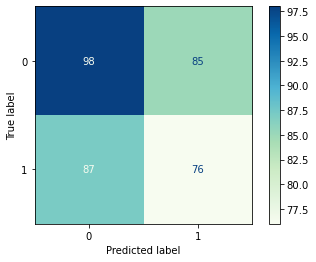

In [163]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [164]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.49803024645257654

In [165]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.5370588235294117